# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
total_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_fares_city = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = pyber_data_df.groupby(["type"]).mean()["driver_count"]
avg_fare_driver

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
# using pandas.concat() method
Pyber_summary_df = pd.concat([total_ride_count, total_driver_count, total_fares_city, avg_fare_ride,avg_fare_driver],axis = 1) 
Pyber_summary_df

,ride_id,driver_count,fare,fare,driver_count
type,,,,,
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
#Pyber_summary_df.index.name    # Too get the name of the index
Pyber_summary_df.index.name = None  # To set the name index to None

In [11]:
Pyber_summary_df

,ride_id,driver_count,fare,fare,driver_count
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [12]:
#  8. Format the columns.
Pyber_summary_df_new = Pyber_summary_df.set_axis(["Total Rides", "Total Drivers", "Total Fares", "Average Fare per Ride", "Average Fare per Driver"], axis = 1)
Pyber_summary_df_new


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [13]:
Pyber_summary_df_new["Total Rides"] = Pyber_summary_df_new["Total Rides"].map("{:,.0f}".format)
Pyber_summary_df_new["Total Drivers"] = Pyber_summary_df_new["Total Drivers"].map("{:,.0f}".format)

Pyber_summary_df_new["Total Fares"] = Pyber_summary_df_new["Total Fares"].map("${:,.2f}".format)

Pyber_summary_df["Average Fare per Ride"] = Pyber_summary_df_new["Average Fare per Ride"].map("${:.2f}".format)
Pyber_summary_df["Average Fare per Driver"] = Pyber_summary_df_new["Average Fare per Driver"].map("${:.2f}".format)

Pyber_summary_df_new

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",34.623440,4.296000
Suburban,625,"8,570","$19,356.33",30.970128,13.712000
Urban,"1,625","59,602","$39,854.38",24.525772,36.678154


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [25]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [26]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [27]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_dates = pyber_data_df.groupby(by = ["date", "type"]).sum()[["fare"]]   #use double brackets, if we want a df
sum_fares_dates = pd.DataFrame(sum_fares_dates)                                   # otherwise will crreate a series
sum_fares_dates                                                                   # in my case, without the doulble[]


,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [28]:
#sum_fares_dates.set_index(["type","date"], inplace = True)

In [29]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
#sum_fares_dates = sum_fares_dates.reset_index

In [30]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivotTable = pd.pivot_table(sum_fares_dates, index = "date", columns = "type", values = "fare")
pivotTable

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [35]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# It is important that the fist date be the smallest
# When teh date is the index, we have to use this kind of code.
pivotTable_new_df = pivotTable.loc["2019-01-01":"2019-04-29"]
pivotTable_new_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [43]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#df.index = pd.to_datetime(df.index)
pivotTable_new_df.index = pd.to_datetime(pivotTable_new_df.index)
pivotTable_new_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [44]:
# 7. Check that the datatype for the index is datetime using df.info()
pivotTable_new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [38]:
pivotTable_new_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [60]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_week_df = pivotTable_new_df.resample("W").sum()
sum_week_df
#df.resample('M', on='week_starting').mean()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


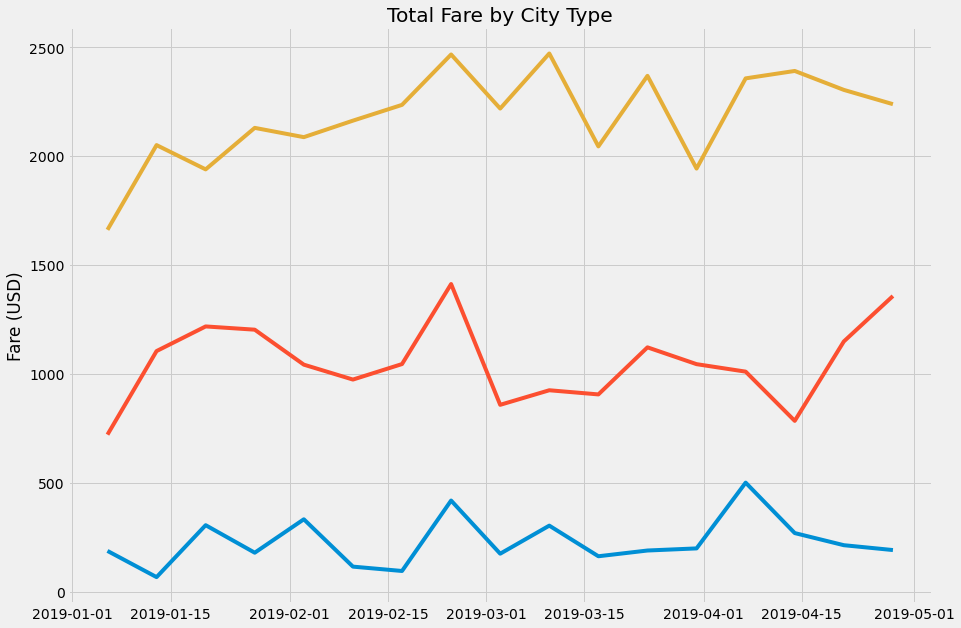

In [115]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

from matplotlib import style

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize= (12,8))

ax = fig.add_axes([0,0,1,1])
ax.plot(sum_week_df)
ax.set_title("Total Fare by City Type")
ax.set_ylabel('Fare (USD)')
plt.show()

# End